# Employee attrition prediction using IBM dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## importing librarys

In [ ]:

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


## importing dataset

In [ ]:
ibm = pd.read_csv("/content/drive/MyDrive/PSP/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Dataset info

In [ ]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Null values in dataset

In [ ]:
ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

we have 8 object columns and remaining are int columns

'Over18',
'OverTime',
'JobRole',
'MaritalStatus',
'Gender',
'EducationField',
'Attrition',
'BusinessTravel',
'Department'

In [ ]:
ibm.duplicated().sum()

0

In [ ]:
ibm

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


-

EmployeeCount have employee count and its '1' for all ,
Over18 is about employer is above 18 or not, obviously every employe is over 18 years only , 'Y' for all ,
StandardHours is same for all '80'
so we are droping them and EmployeeNumber column also droping

In [ ]:
ibm.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [ ]:
ibm

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
column =['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [ ]:
for col in column:
    if ibm[col].dtype == 'object':
        print(col)

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


In [ ]:
ibm = ibm.reindex(columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Age', 'DailyRate',  'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',  'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',  'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

now dataset is frist replaced with string columns then integer columns

In [ ]:
ibm

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,41,1102,...,3,1,0,8,0,1,6,4,0,5
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,49,279,...,4,4,1,10,3,3,10,7,1,7
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,37,1373,...,3,2,0,7,3,3,0,0,0,0
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,33,1392,...,3,3,0,8,3,3,8,7,3,0
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,27,591,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No,36,884,...,3,3,1,17,3,3,5,2,0,3
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No,39,613,...,3,1,1,9,5,3,7,7,1,7
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes,27,155,...,4,2,1,6,0,3,6,2,0,3
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No,49,1023,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
colours = ['silver','gray','cyan','teal','pink','coral','lavender','turquoise','olive']
columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime', 'Education', 'EnvironmentSatisfaction',  'JobInvolvement', 'JobLevel',  'JobSatisfaction',  'NumCompaniesWorked',  'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

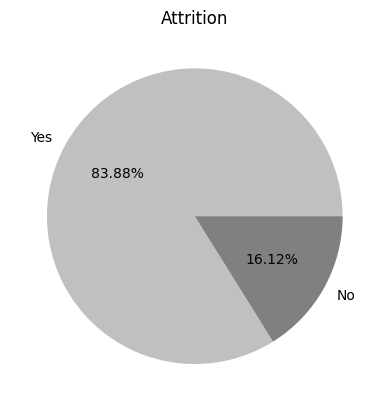

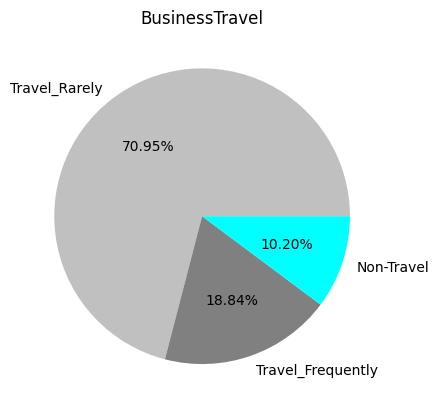

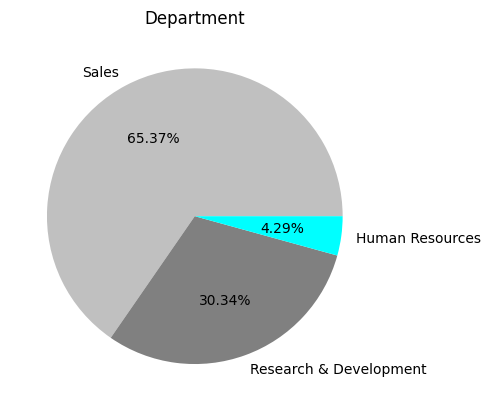

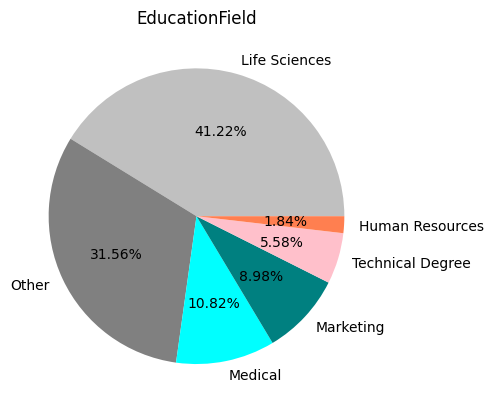

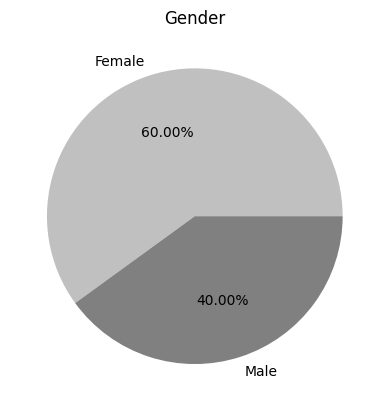

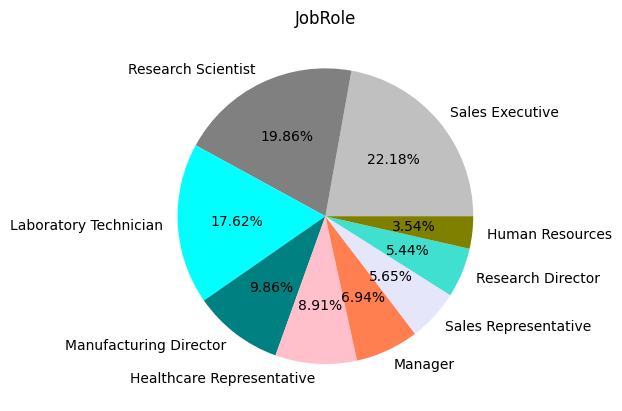

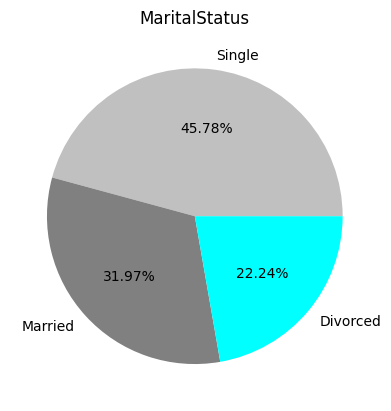

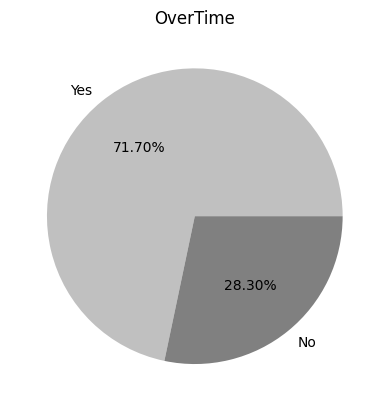

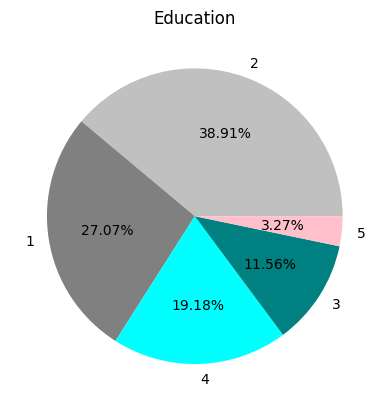

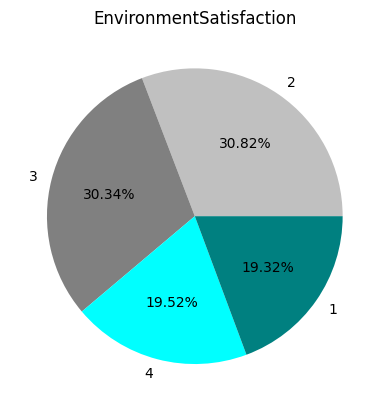

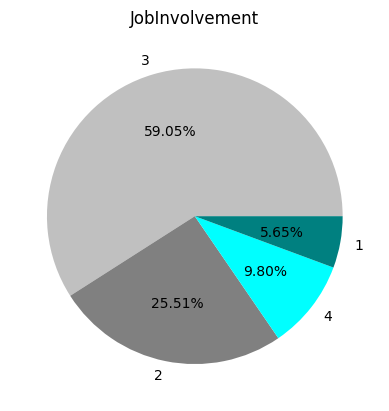

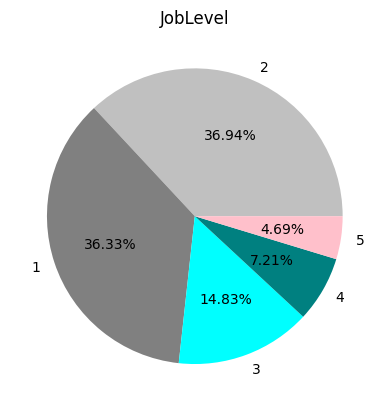

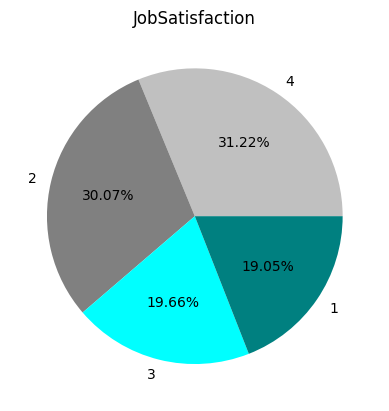

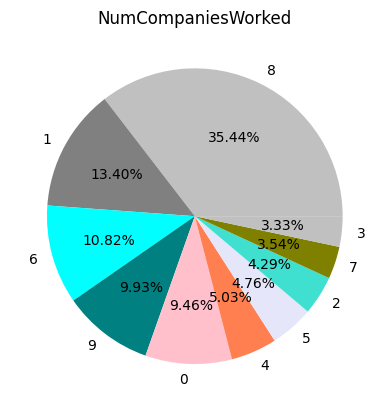

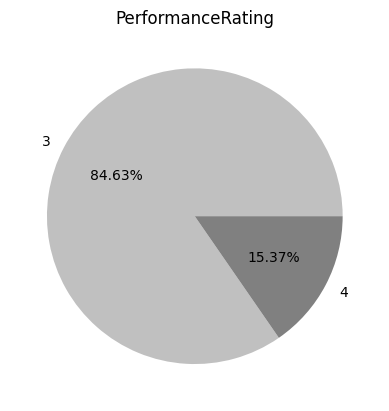

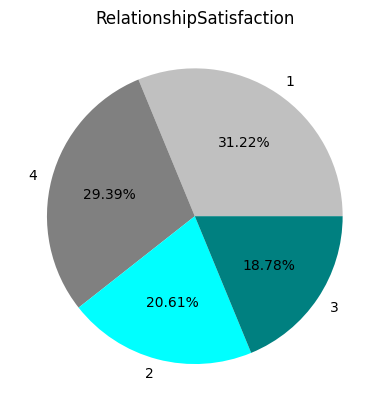

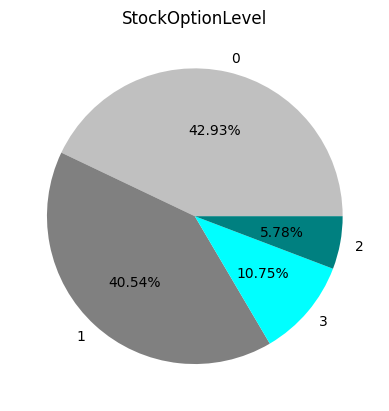

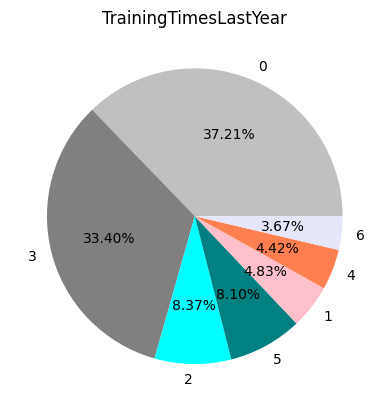

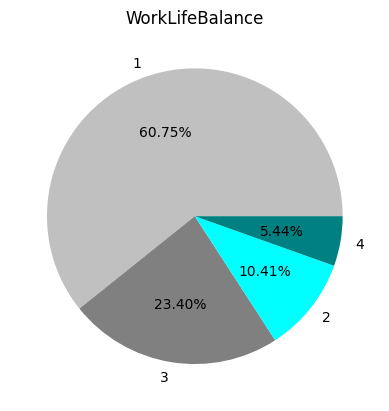

In [ ]:
for col in columns:
    plt.pie(ibm[col].value_counts(),autopct='%0.2f%%',labels=ibm[col].unique(),colors=colours)
    plt.title(col)
    plt.show()

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [ ]:
columns=['Age', 'DailyRate',  'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',  'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',  'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

'Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime',

In [ ]:
col = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for x in col:
    ibm[f'{x}_codes']=ibm[x].astype('category').cat.codes

In [ ]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   Department                1470 non-null   object
 3   EducationField            1470 non-null   object
 4   Gender                    1470 non-null   object
 5   JobRole                   1470 non-null   object
 6   MaritalStatus             1470 non-null   object
 7   OverTime                  1470 non-null   object
 8   Age                       1470 non-null   int64 
 9   DailyRate                 1470 non-null   int64 
 10  DistanceFromHome          1470 non-null   int64 
 11  Education                 1470 non-null   int64 
 12  EnvironmentSatisfaction   1470 non-null   int64 
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [ ]:
ibm.iloc[:,[0,-8,1,-7,2,-6]]

,Attrition,Attrition_codes,BusinessTravel,BusinessTravel_codes,Department,Department_codes
0,Yes,1,Travel_Rarely,2,Sales,2
1,No,0,Travel_Frequently,1,Research & Development,1
2,Yes,1,Travel_Rarely,2,Research & Development,1
3,No,0,Travel_Frequently,1,Research & Development,1
4,No,0,Travel_Rarely,2,Research & Development,1
...,...,...,...,...,...,...
1465,No,0,Travel_Frequently,1,Research & Development,1
1466,No,0,Travel_Rarely,2,Research & Development,1
1467,No,0,Travel_Rarely,2,Research & Development,1
1468,No,0,Travel_Frequently,1,Sales,2


In [ ]:
ibm

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_codes,BusinessTravel_codes,Department_codes,EducationField_codes,Gender_codes,JobRole_codes,MaritalStatus_codes,OverTime_codes
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,41,1102,...,0,5,1,2,2,1,0,7,2,1
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,49,279,...,1,7,0,1,1,1,1,6,1,0
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,37,1373,...,0,0,1,2,1,4,1,2,2,1
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,33,1392,...,3,0,0,1,1,1,0,6,1,1
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,27,591,...,2,2,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No,36,884,...,0,3,0,1,1,3,1,2,1,0
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No,39,613,...,1,7,0,2,1,3,1,0,1,0
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes,27,155,...,0,3,0,2,1,1,1,4,1,1
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No,49,1023,...,0,8,0,1,2,3,1,7,1,0


# Balancing dataset

In [ ]:
from imblearn.over_sampling import ADASYN

# Separate input features and target
X = ibm.iloc[:,8:]
X.drop('Attrition_codes', axis=1,inplace=True)
Y = ibm['Attrition_codes']

# Use ADASYN to oversample the minority class
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, Y)

# Create a new balanced dataset
ibm_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Attrition_codes'])], axis=1)
ibm_balanced

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_codes,Department_codes,EducationField_codes,Gender_codes,JobRole_codes,MaritalStatus_codes,OverTime_codes,Attrition_codes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,5,2,2,1,0,7,2,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,1,7,1,1,1,1,6,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,2,1,4,1,2,2,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,1,1,1,0,6,1,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,40,1064,8,2,1,70,1,2,2,5345,...,0,0,1,1,2,0,2,0,0,1
2389,50,417,27,3,3,40,2,3,1,10829,...,1,0,2,1,2,0,6,0,0,1
2390,46,376,27,3,4,44,2,3,1,10320,...,1,0,2,2,2,1,7,0,1,1
2391,47,691,26,3,3,55,2,3,1,11469,...,1,0,1,2,1,0,7,0,1,1


# Scaling the Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
X_resampled=pd.DataFrame(StandardScaler.fit_transform(X_resampled))
X_resampled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.614919,0.833964,-1.123514,-0.756105,-0.435052,1.524297,0.626384,0.128422,1.397211,0.017238,...,0.111200,-0.653184,0.436222,0.753023,1.534315,-0.896995,-1.029262,1.085275,1.325239,1.577447
1,1.512244,-1.326964,-0.210100,-1.772599,0.496146,-0.225833,-0.728893,0.128422,-0.460303,-0.181250,...,1.004156,-0.323700,1.034433,-0.774082,-0.348565,-0.896995,0.971570,0.661472,-0.101987,-0.633936
2,0.166256,1.545521,-0.993026,-0.756105,1.427345,1.418229,-0.728893,-0.834941,0.468454,-0.880446,...,-1.079409,-0.653184,-1.059307,0.753023,-0.348565,1.498662,0.971570,-1.033739,1.325239,1.577447
3,-0.282406,1.595409,-0.862538,1.276883,1.427345,-0.491005,0.626384,-0.834941,0.468454,-0.692077,...,1.004156,0.335266,-1.059307,-0.774082,-0.348565,-0.896995,-1.029262,0.661472,-0.101987,1.577447
4,-0.955400,-0.507754,-0.993026,-1.772599,-1.366251,-1.339553,0.626384,-0.834941,-0.460303,-0.563508,...,-0.484104,0.005783,-0.461095,0.753023,-0.348565,0.700110,0.971570,-1.033739,-0.101987,-0.633936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,0.502753,0.734189,-0.210100,-0.756105,-1.366251,0.251475,-2.084169,0.128422,-0.460303,-0.131801,...,-1.079409,-0.653184,-1.059307,-0.774082,-0.348565,-0.098442,-1.029262,-1.033739,-1.529214,-0.633936
2389,1.624410,-0.964621,2.269166,0.260389,0.496146,-1.339553,-0.728893,1.091784,-1.389060,1.129512,...,-0.484104,-0.323700,-1.059307,0.753023,-0.348565,-0.098442,-1.029262,0.661472,-1.529214,-0.633936
2390,1.175747,-1.072274,2.269166,0.260389,1.427345,-1.127416,-0.728893,1.091784,-1.389060,1.012442,...,-0.484104,-0.323700,-1.059307,0.753023,1.534315,-0.098442,0.971570,1.085275,-1.529214,1.577447
2391,1.287913,-0.245187,2.138678,0.260389,0.496146,-0.544039,-0.728893,1.091784,-1.389060,1.276711,...,-0.781757,-0.323700,-1.059307,-0.774082,1.534315,-0.896995,-1.029262,1.085275,-1.529214,1.577447


# Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=49)

# Machine learning models

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model_dt = DecisionTreeClassifier()
model_dt.fit(Xtrain,Ytrain)
pp=model_dt.predict(Xtest)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Calculate precision, recall, and F1 score
accuracy = accuracy_score(pp,Ytest)*100
precision = precision_score(pp, Ytest)*100
recall = recall_score(pp, Ytest)*100
f1 = f1_score(pp, Ytest)*100

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 79.95824634655533
Precision: 82.91666666666667
Recall: 78.34645669291339
F1 score: 80.56680161943322


In [ ]:
confusion_matrix(Ytest, pp)

array([[184,  55],
       [ 41, 199]])

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

model_lr.fit(Xtrain,Ytrain)
pp = model_lr.predict(Xtest)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Calculate precision, recall, and F1 score
accuracy = accuracy_score(pp,Ytest)*100
precision = precision_score(pp, Ytest)*100
recall = recall_score(pp, Ytest)*100
f1 = f1_score(pp, Ytest)*100

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 81.62839248434238
Precision: 82.5
Recall: 81.14754098360656
F1 score: 81.81818181818183


In [ ]:
confusion_matrix(Ytest, pp)

array([[193,  46],
       [ 42, 198]])

# K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelknr = KNeighborsClassifier()

modelknr

modelknr.fit(Xtrain , Ytrain)

pp = modelknr.predict(Xtest)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Calculate precision, recall, and F1 score
accuracy = accuracy_score(pp,Ytest)*100
precision = precision_score(pp, Ytest)*100
recall = recall_score(pp, Ytest)*100
f1 = f1_score(pp, Ytest)*100

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 84.75991649269311
Precision: 97.91666666666666
Recall: 77.55775577557755
F1 score: 86.5561694290976


In [ ]:
confusion_matrix(Ytest, pp)

array([[193,  46],
       [ 42, 198]])

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier()
modelrf.fit(Xtrain,Ytrain)
pp = modelrf.predict(Xtest)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Calculate precision, recall, and F1 score
accuracy = accuracy_score(pp,Ytest)*100
precision = precision_score(pp, Ytest)*100
recall = recall_score(pp, Ytest)*100
f1 = f1_score(pp, Ytest)*100

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 91.44050104384134
Precision: 91.25
Recall: 91.63179916317992
F1 score: 91.44050104384134


In [ ]:
confusion_matrix(Ytest, pp)

array([[219,  20],
       [ 21, 219]])

# SVC (Support Vector Machine Classifier)

In [ ]:
from sklearn.svm import SVC
model_sv = SVC()
model_sv.fit(Xtrain,Ytrain)
pp = model_sv.predict(Xtest)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Calculate precision, recall, and F1 score
accuracy = accuracy_score(pp,Ytest)*100
precision = precision_score(pp, Ytest)*100
recall = recall_score(pp, Ytest)*100
f1 = f1_score(pp, Ytest)*100

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 89.56158663883089
Precision: 90.41666666666667
Recall: 88.9344262295082
F1 score: 89.6694214876033


In [ ]:
confusion_matrix(Ytest, pp)

array([[212,  27],
       [ 23, 217]])

# Deep Learning Models



# Multilayer Perceptron (MLP)

Epoch 1/150
120/120 [==============================] - 3s 6ms/step - loss: 1.0114 - accuracy: 0.4459 - val_loss: 0.8503 - val_accuracy: 0.4990
Epoch 2/150
120/120 [==============================] - 1s 5ms/step - loss: 0.6974 - accuracy: 0.6080 - val_loss: 0.5863 - val_accuracy: 0.7182
Epoch 3/150
120/120 [==============================] - 1s 5ms/step - loss: 0.5098 - accuracy: 0.7656 - val_loss: 0.4423 - val_accuracy: 0.7975
Epoch 4/150
120/120 [==============================] - 1s 4ms/step - loss: 0.4236 - accuracy: 0.8120 - val_loss: 0.4009 - val_accuracy: 0.8267
Epoch 5/150
120/120 [==============================] - 1s 5ms/step - loss: 0.3855 - accuracy: 0.8333 - val_loss: 0.3824 - val_accuracy: 0.8267
Epoch 6/150
120/120 [==============================] - 1s 4ms/step - loss: 0.3632 - accuracy: 0.8475 - val_loss: 0.3754 - val_accuracy: 0.8351
Epoch 7/150
120/120 [==============================] - 1s 6ms/step - loss: 0.3490 - accuracy: 0.8491 - val_loss: 0.3647 - val_accuracy: 0.8580

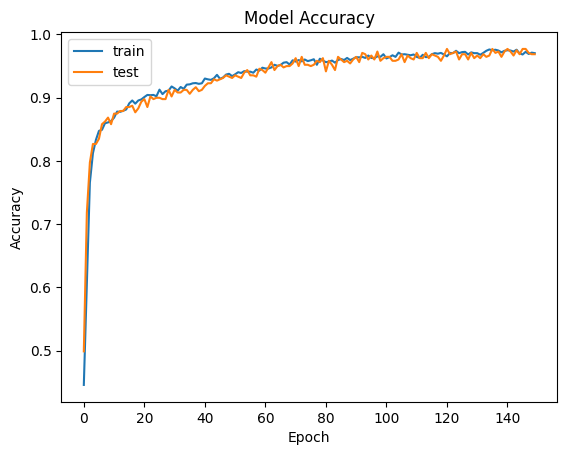

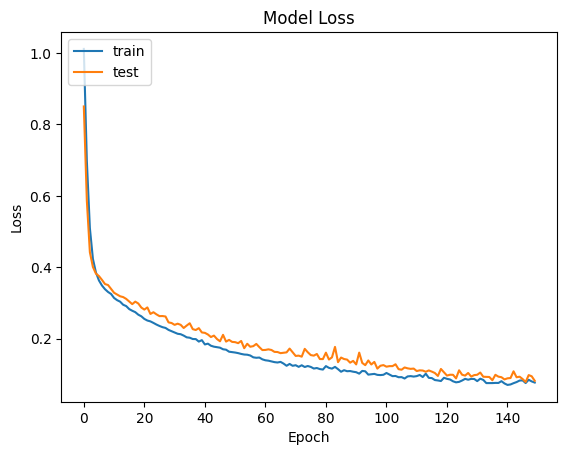

15/15 [==============================] - 0s 2ms/step
Accuracy: 0.9686847599164927
Precision: 0.9707112970711297
Recall: 0.9666666666666667
F1 score: 0.9686847599164927


array([[232,   7],
       [  8, 232]])

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix

model = Sequential()
model.add(Dense(10, input_dim=30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_resampled,y_resampled,epochs=150,batch_size=20,validation_data=(Xtest, Ytest))

# plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot the training and validation loss over each epoch

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model on test set
y_prob = model.predict(Xtest)
y_pred = np.argmax(y_prob, axis=1)
# Calculate precision, recall, and F1 score
accuracy = accuracy_score(Ytest,y_pred)
precision = precision_score(Ytest, y_pred)
recall = recall_score(Ytest, y_pred)
f1 = f1_score(Ytest, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

confusion_matrix(Ytest, y_pred)

# 10 Fold cross validation

15/15 [==============================] - 0s 3ms/step


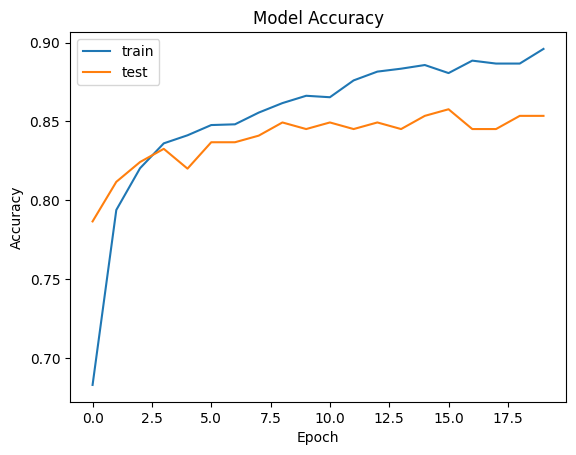

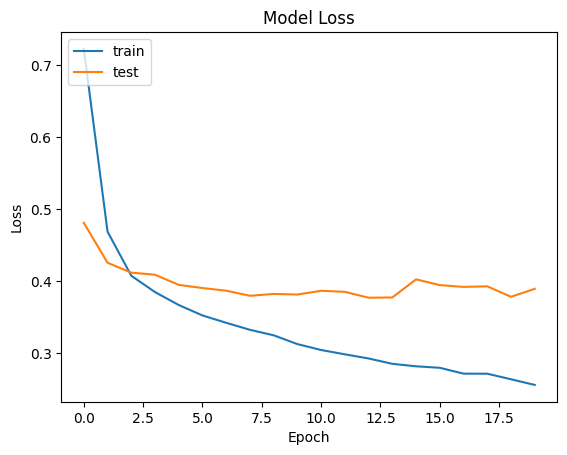

Average accuracy: 0.8933194154488519
Average precision: 0.8964998756735169
Average recall: 0.8908333333333334
Average F1 score: 0.8931723031395113


In [ ]:
from sklearn.model_selection import KFold

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

accuracies = []
precisions = []
recalls = []
f1s = []

for train_idx, val_idx in kfold.split(X_resampled, y_resampled):
    # split data into train and validation sets
    X_train, y_train = X_resampled.iloc[train_idx], y_resampled.iloc[train_idx]
    X_val, y_val = X_resampled.iloc[val_idx], y_resampled.iloc[val_idx]

    # define and compile model
    model1 = Sequential()
    model1.add(Dense(10, input_dim=30, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(3, activation='softmax'))
    model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # train model1
    history = model1.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val), verbose=0)

    # evaluate model on test set
    y_prob = model1.predict(Xtest)
    y_pred = np.argmax(y_prob, axis=1)

    # calculate metrics
    accuracy = accuracy_score(Ytest, y_pred)
    precision = precision_score(Ytest, y_pred)
    recall = recall_score(Ytest, y_pred)
    f1 = f1_score(Ytest, y_pred)

    # append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

# plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# calculate average metrics over all folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1s) / len(f1s)

print('Average accuracy:', avg_accuracy)
print('Average precision:', avg_precision)
print('Average recall:', avg_recall)
print('Average F1 score:', avg_f1)


# CNN (Convolutional Neural Network)

Epoch 1/30
240/240 [==============================] - 2s 4ms/step - loss: 0.5278 - accuracy: 0.7534 - val_loss: 0.4280 - val_accuracy: 0.8121
Epoch 2/30
240/240 [==============================] - 1s 5ms/step - loss: 0.4191 - accuracy: 0.8157 - val_loss: 0.3824 - val_accuracy: 0.8434
Epoch 3/30
240/240 [==============================] - 1s 5ms/step - loss: 0.3772 - accuracy: 0.8391 - val_loss: 0.3603 - val_accuracy: 0.8497
Epoch 4/30
240/240 [==============================] - 1s 6ms/step - loss: 0.3425 - accuracy: 0.8579 - val_loss: 0.3328 - val_accuracy: 0.8643
Epoch 5/30
240/240 [==============================] - 1s 5ms/step - loss: 0.3208 - accuracy: 0.8713 - val_loss: 0.3299 - val_accuracy: 0.8664
Epoch 6/30
240/240 [==============================] - 1s 4ms/step - loss: 0.3056 - accuracy: 0.8709 - val_loss: 0.3090 - val_accuracy: 0.8685
Epoch 7/30
240/240 [==============================] - 1s 4ms/step - loss: 0.2908 - accuracy: 0.8801 - val_loss: 0.2973 - val_accuracy: 0.8810
Epoch 

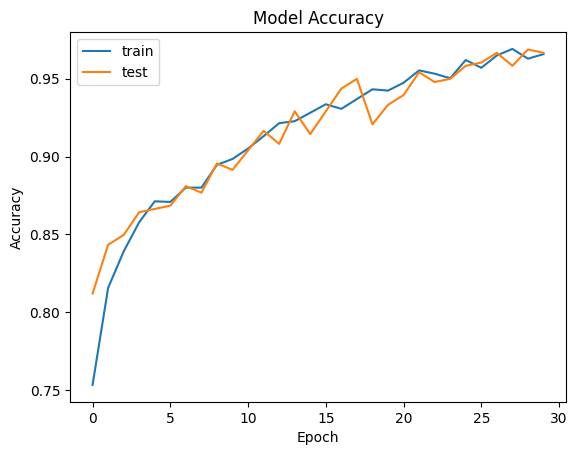

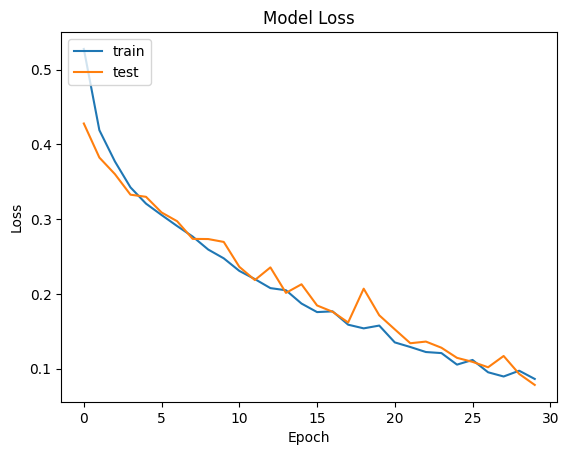

15/15 [==============================] - 0s 2ms/step
Accuracy: 0.9665970772442589
Precision: 0.9628099173553719
Recall: 0.9708333333333333
F1 score: 0.966804979253112


array([[230,   9],
       [  7, 233]])

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dense
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix

Xresampled = X_resampled.to_numpy().reshape(-1, 30, 1)
X_test = Xtest.to_numpy().reshape(-1, 30, 1)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(30, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(Xresampled, y_resampled, epochs=30, batch_size=10,validation_data=(X_test, Ytest))

# plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate the model on test set
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(Ytest,y_pred)
precision = precision_score(Ytest, y_pred)
recall = recall_score(Ytest, y_pred)
f1 = f1_score(Ytest, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:',f1)
confusion_matrix(Ytest,y_pred)

# LTSM (Long Short-Term Memory Layer)

Epoch 1/65
240/240 [==============================] - 7s 23ms/step - loss: 0.7410 - accuracy: 0.6013 - val_loss: 0.6738 - val_accuracy: 0.5491
Epoch 2/65
240/240 [==============================] - 4s 16ms/step - loss: 0.7743 - accuracy: 0.5545 - val_loss: 0.6884 - val_accuracy: 0.7077
Epoch 3/65
240/240 [==============================] - 4s 15ms/step - loss: 0.6101 - accuracy: 0.7033 - val_loss: 0.5313 - val_accuracy: 0.7704
Epoch 4/65
240/240 [==============================] - 6s 23ms/step - loss: 0.5432 - accuracy: 0.7397 - val_loss: 0.5196 - val_accuracy: 0.7808
Epoch 5/65
240/240 [==============================] - 6s 25ms/step - loss: 0.5296 - accuracy: 0.7380 - val_loss: 0.5361 - val_accuracy: 0.7829
Epoch 6/65
240/240 [==============================] - 4s 17ms/step - loss: 0.5262 - accuracy: 0.7434 - val_loss: 0.5127 - val_accuracy: 0.7662
Epoch 7/65
240/240 [==============================] - 5s 22ms/step - loss: 0.5179 - accuracy: 0.7476 - val_loss: 0.5034 - val_accuracy: 0.7683

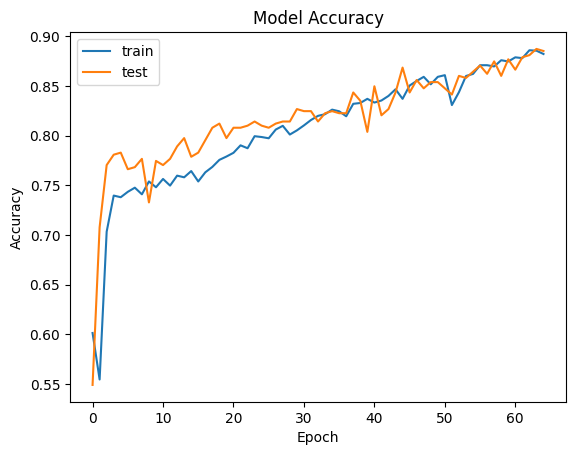

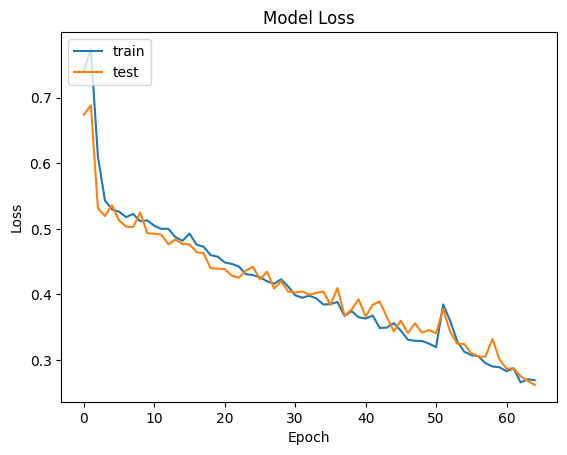

15/15 [==============================] - 0s 7ms/step
Accuracy: 0.8851774530271399
Precision: 0.8714859437751004
Recall: 0.9041666666666667
F1 score: 0.8875255623721882


array([[207,  32],
       [ 23, 217]])

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


model = Sequential()

model.add(LSTM(64, input_shape=(30, 1), activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_resampled, y_resampled, epochs=65, batch_size=10, validation_data=(Xtest, Ytest))


# plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate the model on test set
X_test = Xtest.to_numpy().reshape(-1, 30, 1)
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)


# Calculate precision, recall, and F1 score
accuracy = accuracy_score(Ytest, y_pred)
precision = precision_score(Ytest, y_pred)
recall = recall_score(Ytest, y_pred)
f1 = f1_score(Ytest, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
confusion_matrix(Ytest, y_pred)


# GRU (Gated Recurring Unit)

Epoch 1/50
240/240 [==============================] - 6s 17ms/step - loss: 0.7154 - accuracy: 0.5905 - val_loss: 0.6022 - val_accuracy: 0.6701
Epoch 2/50
240/240 [==============================] - 4s 16ms/step - loss: 0.5833 - accuracy: 0.6995 - val_loss: 0.5284 - val_accuracy: 0.7370
Epoch 3/50
240/240 [==============================] - 6s 23ms/step - loss: 0.5305 - accuracy: 0.7263 - val_loss: 0.5335 - val_accuracy: 0.7349
Epoch 4/50
240/240 [==============================] - 4s 16ms/step - loss: 0.5267 - accuracy: 0.7317 - val_loss: 0.5077 - val_accuracy: 0.7704
Epoch 5/50
240/240 [==============================] - 4s 16ms/step - loss: 0.5188 - accuracy: 0.7443 - val_loss: 0.5532 - val_accuracy: 0.7077
Epoch 6/50
240/240 [==============================] - 5s 22ms/step - loss: 0.5086 - accuracy: 0.7509 - val_loss: 0.4864 - val_accuracy: 0.7683
Epoch 7/50
240/240 [==============================] - 4s 17ms/step - loss: 0.4945 - accuracy: 0.7626 - val_loss: 0.4754 - val_accuracy: 0.7871

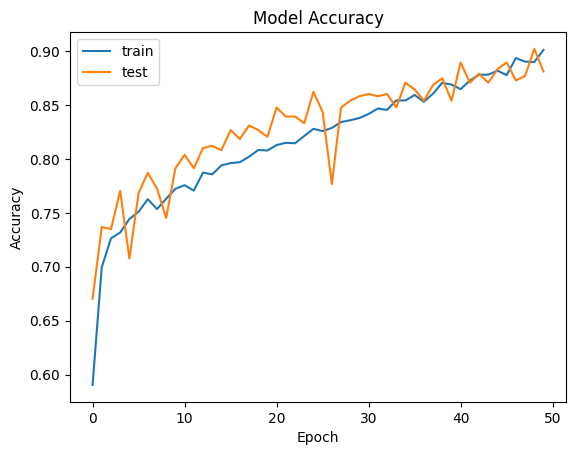

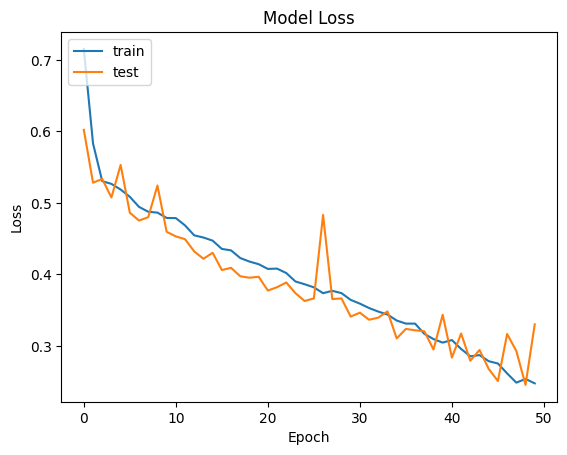

15/15 [==============================] - 0s 5ms/step
Accuracy: 0.8810020876826722
Precision: 0.9644670050761421
Recall: 0.7916666666666666
F1 score: 0.8695652173913044


array([[232,   7],
       [ 50, 190]])

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


model = Sequential()

model.add(GRU(64, input_shape=(30, 1), activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_resampled, y_resampled, epochs=50, batch_size=10, validation_data=(Xtest, Ytest))


# plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate the model on test set
X_test = Xtest.to_numpy().reshape(-1, 30, 1)
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(Ytest, y_pred)
precision = precision_score(Ytest, y_pred)
recall = recall_score(Ytest, y_pred)
f1 = f1_score(Ytest, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
confusion_matrix(Ytest, y_pred)


# Thank you.....